In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Generate synthetic data
X=np.linspace(0,10,100).astype(np.float32)
y=4*X+1+np.random.randn(*X.shape).astype(np.float32)*0.5

In [11]:
#Convert to tensor
X_tensor=tf.convert_to_tensor(X.reshape(-1,1))
y_tensor=tf.convert_to_tensor(y.reshape(-1,1))

In [12]:
#Initialize weights and bias variable
W=tf.Variable(tf.random.normal([1,1]))
b=tf.Variable(tf.zeros([1]))

In [13]:
#Set learning rate and epochs
learning_rate=0.01
epochs=200

In [14]:
#Training loop using GradientTape
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred=tf.matmul(X_tensor,W)+b
        loss=tf.reduce_mean(tf.square(y_pred-y_tensor))

    gradients=tape.gradient(loss,[W,b])
    W.assign_sub(learning_rate*gradients[0])
    b.assign_sub(learning_rate*gradients[1])    

In [17]:
#Make prediction after training
y_pred=tf.matmul(X_tensor,W)+b
y

array([ 0.4462039,  1.5317389,  1.6582474,  2.4348075,  1.96614  ,
        2.9040577,  3.5618541,  3.8576915,  4.6695104,  4.608854 ,
        4.580305 ,  5.3575735,  5.7558074,  7.2986317,  6.5096955,
        6.786508 ,  7.9017158,  8.038349 ,  9.313989 ,  8.319878 ,
        8.789792 ,  8.17116  ,  9.37482  , 10.185653 , 11.147512 ,
       11.216194 , 12.214579 , 12.253523 , 12.832151 , 14.125167 ,
       12.710397 , 12.8564625, 13.901522 , 14.168274 , 14.20767  ,
       14.632506 , 15.243943 , 15.223327 , 16.100117 , 17.956686 ,
       16.960306 , 17.356682 , 17.937378 , 18.80399  , 18.396708 ,
       19.840641 , 19.30619  , 20.095493 , 20.020826 , 21.346764 ,
       20.254137 , 21.134962 , 22.109215 , 22.087843 , 21.592886 ,
       23.26047  , 23.311718 , 24.341915 , 24.497988 , 24.8523   ,
       24.905483 , 25.680302 , 26.35396  , 26.252235 , 26.962896 ,
       27.257832 , 28.970974 , 27.92133  , 28.00884  , 29.189201 ,
       30.164114 , 30.089062 , 30.028309 , 31.113413 , 31.8814

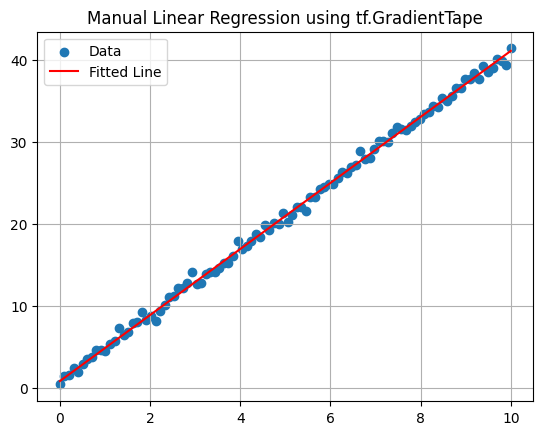

In [20]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred.numpy(), color='red', label='Fitted Line')
plt.title("Manual Linear Regression using tf.GradientTape")
plt.legend()
plt.grid(True)
plt.show()